<a href="https://colab.research.google.com/github/Lreinoso15/serie_ACARA_patentamientos_2014-2022/blob/main/Series_de_tiempo_TP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

archivo = '/content/drive/MyDrive/AST/train.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(archivo)

In [ ]:
# === 2. Primeras filas ===
print("=== Primeras 5 filas ===")
print(df.head(), "\n")

# === 3. Información general ===
print("=== Información de columnas ===")
print(df.info(), "\n")

# === 4. Valores nulos ===
print("=== Valores nulos por columna ===")
print(df.isnull().sum(), "\n")

# === 5. Duplicados ===
print("=== Filas duplicadas ===")
print(df.duplicated().sum(), "\n")

# === 6. Estadísticas descriptivas ===
print("=== Estadísticas descriptivas ===")
print(df.describe(include='all').transpose(), "\n")




=== Primeras 5 filas ===
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region    

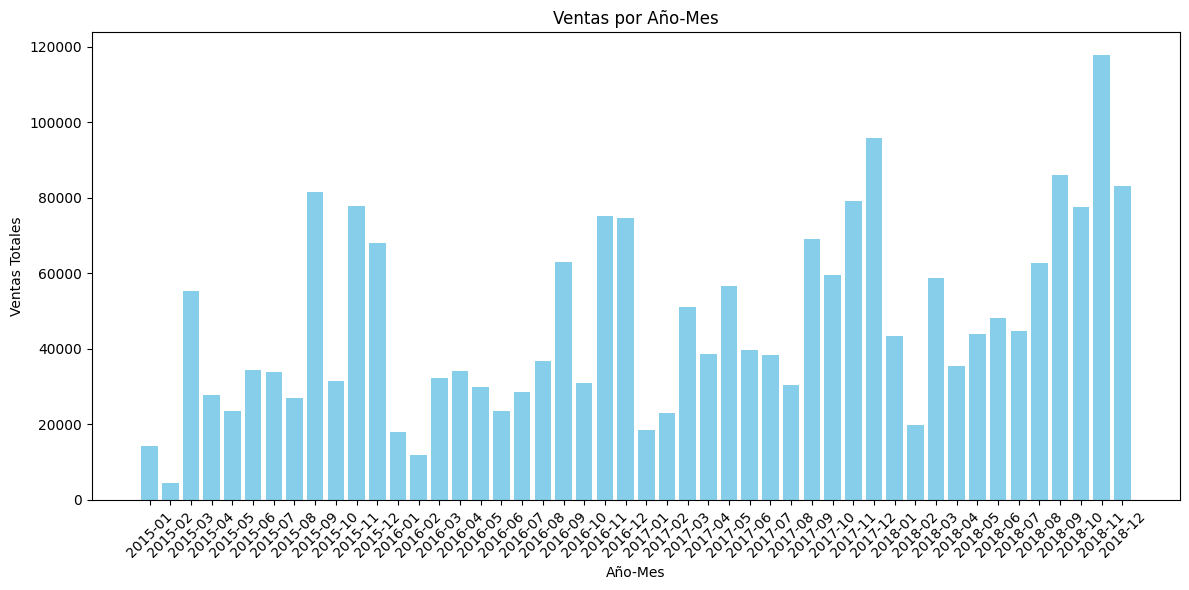

In [ ]:
# Convertir "Order Date" a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Crear columna año-mes
df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Agrupar por año-mes y sumar ventas
ventas_mensuales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Ordenar por fecha real (por si no está ordenado el CSV)
ventas_mensuales['Year-Month'] = pd.to_datetime(ventas_mensuales['Year-Month'])
ventas_mensuales = ventas_mensuales.sort_values('Year-Month')

# Graficar
plt.figure(figsize=(12,6))
plt.bar(ventas_mensuales['Year-Month'].dt.strftime('%Y-%m'),
        ventas_mensuales['Sales'],
        color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Año-Mes')
plt.tight_layout()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/xxvgrv9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/u1lghcin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26747', 'data', 'file=/tmp/tmp7kv94d5r/xxvgrv9v.json', 'init=/tmp/tmp7kv94d5r/u1lghcin.json', 'output', 'file=/tmp/tmp7kv94d5r/prophet_model8_n0ugaj/prophet_model-20250811233225.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


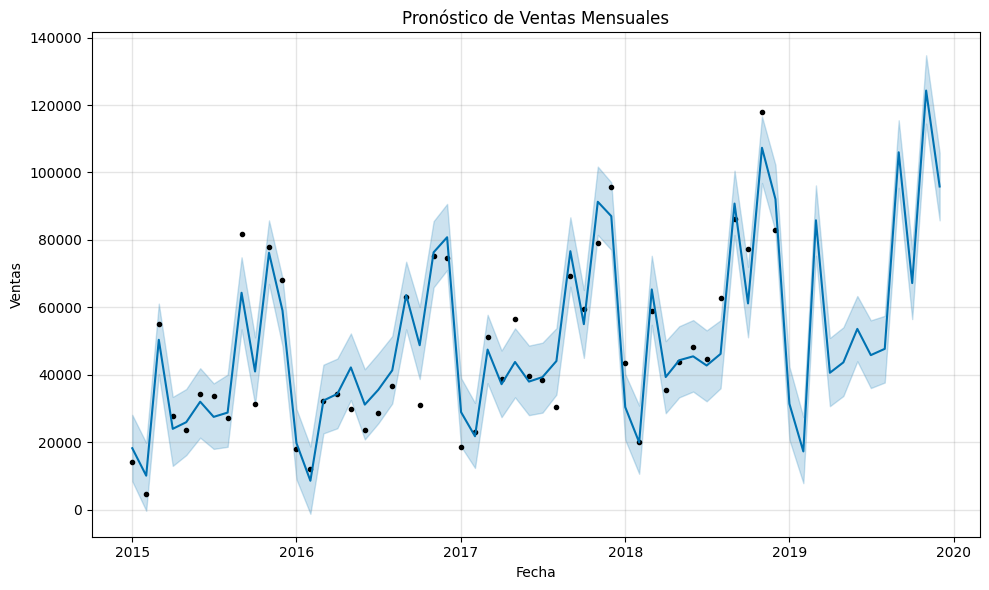

In [ ]:
!pip -q install prophet

from prophet import Prophet

# Convertir "Order Date" a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# === 2. Agregar ventas por mes ===
df_monthly = (
    df.groupby(pd.Grouper(key='Order Date', freq='MS'))['Sales']
      .sum()
      .reset_index()
      .rename(columns={'Order Date': 'ds', 'Sales': 'y'})
)

# Ordenar por fecha
df_monthly = df_monthly.sort_values('ds')

# === 3. Crear y entrenar el modelo Prophet ===
m = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

m.fit(df_monthly)

# === 4. Hacer forecast para los próximos 12 meses ===
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

# === 5. Graficar resultados ===
m.plot(forecast)
plt.title('Pronóstico de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()


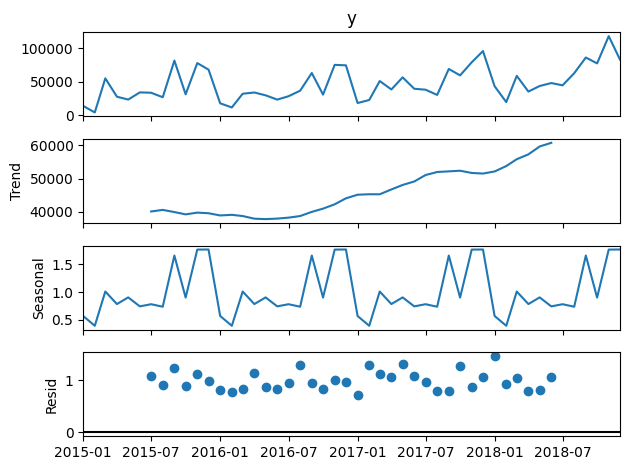

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición exploratoria (mensual, periodo=12 meses)
decomp = seasonal_decompose(df_monthly.set_index('ds')['y'], period=12, model='multiplicative')
decomp.plot()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/tmxa1t98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/z_guoe06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70207', 'data', 'file=/tmp/tmp7kv94d5r/tmxa1t98.json', 'init=/tmp/tmp7kv94d5r/z_guoe06.json', 'output', 'file=/tmp/tmp7kv94d5r/prophet_modelhdxizbq_/prophet_model-20250811233408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:34:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE (hold-out 3m): 20,854.54
MAE  (hold-out 3m): 20,511.68
MAPE (hold-out 3m): 23.58%


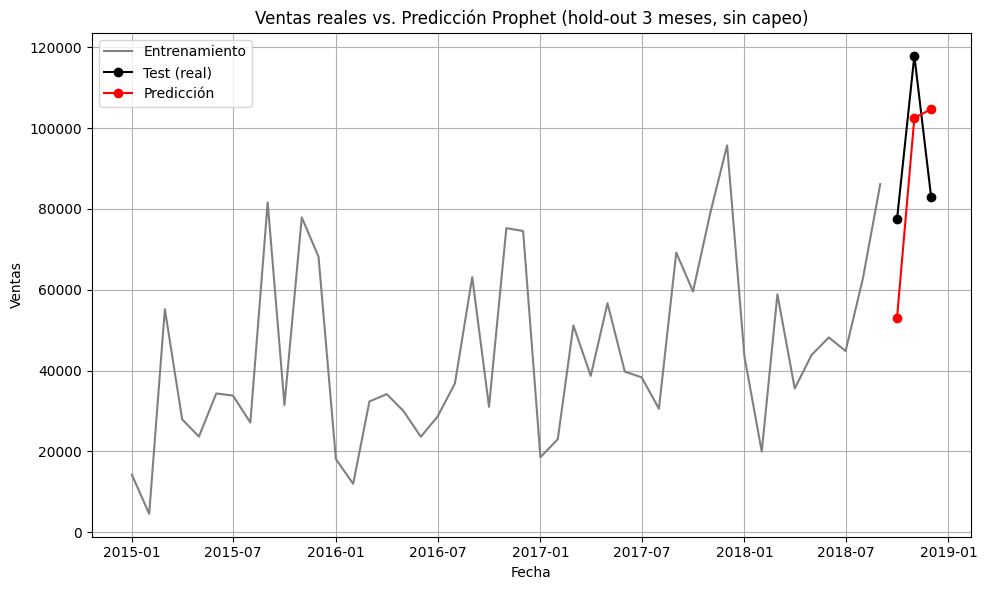

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# === 1. Definir horizonte de test (3 meses) ===
horizon = 3
cutoff = df_monthly['ds'].max() - pd.DateOffset(months=horizon)
train = df_monthly[df_monthly['ds'] <= cutoff].copy()
test  = df_monthly[df_monthly['ds'] >  cutoff].copy()

# === 2. Entrenar Prophet (sin capeo) ===
m = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.3,  # mismos parámetros que en CV
    seasonality_prior_scale=1.0,
    changepoint_range=0.9
)
m.fit(train)

# === 3. Forecast ===
future = m.make_future_dataframe(periods=horizon, freq='MS')
forecast = m.predict(future)

# === 4. Comparar con test ===
pred = forecast[['ds','yhat']].merge(test, on='ds', how='right')

rmse = np.sqrt(np.mean((pred['y'] - pred['yhat'])**2))
mae  = np.mean(np.abs(pred['y'] - pred['yhat']))
mape = np.mean(np.abs((pred['y'] - pred['yhat']) / pred['y'])) * 100

print(f"RMSE (hold-out 3m): {rmse:,.2f}")
print(f"MAE  (hold-out 3m): {mae:,.2f}")
print(f"MAPE (hold-out 3m): {mape:,.2f}%")

# === 5. Gráfico ===
plt.figure(figsize=(10,6))
plt.plot(train['ds'], train['y'], label='Entrenamiento', color='gray')
plt.plot(test['ds'], test['y'], label='Test (real)', color='black', marker='o')
plt.plot(pred['ds'], pred['yhat'], label='Predicción', color='red', marker='o')
plt.title('Ventas reales vs. Predicción Prophet (hold-out 3 meses, sin capeo)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# ======================
# 1) Datos base (sin capeo)
# ======================
X = df_monthly[['ds','y']].copy().sort_values('ds')
X['ds'] = pd.to_datetime(X['ds'])

def months_to_days_str(m):
    days = int(round(m * 365.25 / 12.0))  # ≈30.44 días/mes
    return f"{days} days"

# ======================
# 2) Parámetros CONSISTENTES
# ======================
horizon_m = 3               # 3 meses
period_m  = 3               # 3 meses
n_months  = len(X)

if n_months < horizon_m + 6:
    raise ValueError(f"Serie demasiado corta ({n_months} meses) para horizon={horizon_m}.")

allowed_initial_max = n_months - horizon_m
if allowed_initial_max <= 0:
    raise ValueError("No quedan meses para validar: reduce el horizon o amplía los datos.")

initial_m = int(min(max(24, int(n_months * 0.8)), allowed_initial_max))

initial_str = months_to_days_str(initial_m)
period_str  = months_to_days_str(period_m)
horizon_str = months_to_days_str(horizon_m)

print(f"[CHECK] n_months={n_months} | initial={initial_m}m -> {initial_str} | "
      f"period={period_m}m -> {period_str} | horizon={horizon_m}m -> {horizon_str}")

# ======================
# 3) Entrenar Prophet (sin capeo)
# ======================
m_cv = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.3,
    seasonality_prior_scale=1.0,
    changepoint_range=0.9,
)
m_cv.fit(X)

# ======================
# 4) Cross-Validation
# ======================
df_cv = cross_validation(
    m_cv,
    initial=initial_str,
    period=period_str,
    horizon=horizon_str,
    parallel="processes"
)

# ---- Parche: crear 'horizon' si no existe ----
if 'horizon' not in df_cv.columns:
    df_cv = df_cv.copy()
    df_cv['horizon'] = df_cv['ds'] - df_cv['cutoff']  # Timedelta

# ======================
# 5) Métricas globales
# ======================
df_pm = performance_metrics(df_cv, rolling_window=1)
row_hmax = df_pm.loc[df_pm['horizon'].idxmax()]
print("\n[Cross-Validation Prophet – SIN capeo, H=3 meses, P=3 meses]")
print(f"Horizonte: {row_hmax['horizon']}")
print(f"RMSE: {row_hmax['rmse']:,.2f}")
print(f"MAE : {row_hmax['mae']:,.2f}")
print(f"MAPE: {row_hmax['mape']*100:.2f}%")

# ======================
# 6) Métricas por corte y horizonte
# ======================
def _agg_metrics(g):
    err = g['y'] - g['yhat']
    rmse = float(np.sqrt(np.mean(err**2)))
    mae  = float(np.mean(np.abs(err)))
    denom = g['y'].replace(0, np.nan)  # evita división por cero
    mape = float(np.nanmean(np.abs(err / denom)) * 100)
    return pd.Series({'n_obs': len(g), 'rmse': rmse, 'mae': mae, 'mape': mape})

# a) Por corte (todos los horizontes)
metrics_by_cutoff = (
    df_cv.groupby('cutoff', as_index=False)
         .apply(_agg_metrics)
         .sort_values('cutoff')
         .reset_index(drop=True)
)
print("\n[Métricas por corte (todos los horizontes)]")
print(metrics_by_cutoff)

# b) Por corte y mes de horizonte
df_cv_ext = df_cv.copy()
df_cv_ext['h_months'] = np.rint(df_cv_ext['horizon'].dt.total_seconds() / 86400 / 30.44).astype(int)
metrics_by_cutoff_h = (
    df_cv_ext.groupby(['cutoff','h_months'], as_index=False)
             .apply(_agg_metrics)
             .sort_values(['cutoff','h_months'])
             .reset_index(drop=True)
)
print("\n[Métricas por corte y mes de horizonte]")
print(metrics_by_cutoff_h)

# c) En el horizonte máximo de cada corte
idx_last = df_cv.groupby('cutoff')['horizon'].idxmax()
last_step = df_cv.loc[idx_last]
metrics_at_hmax = (
    last_step.groupby('cutoff', as_index=False)
             .apply(_agg_metrics)
             .sort_values('cutoff')
             .reset_index(drop=True)
)
print("\n[Métricas por corte en el horizonte máximo]")
print(metrics_at_hmax)



DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/4syacy1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/jzmwszkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29133', 'data', 'file=/tmp/tmp7kv94d5r/4syacy1t.json', 'init=/tmp/tmp7kv94d5r/jzmwszkp.json', 'output', 'file=/tmp/tmp7kv94d5r/prophet_model37i5_c_f/prophet_model-20250811233452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[CHECK] n_months=48 | initial=38m -> 1157 days | period=3m -> 91 days | horizon=3m -> 91 days


23:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 3 forecasts with cutoffs between 2018-03-03 00:00:00 and 2018-09-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ae74e14a290>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/rlgg2621.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/bsc_qdq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/e2madw1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kv94d5r/hu4q9u5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31826', 'data', 'file=/tmp/tmp7kv94d5r/bsc_qdq8.json', 'init=/tmp/tmp7kv94d5r/e2madw1w.json', 'output', 'file=/tmp/tmp7kv94d5r/prophet_modeltn0_t195/prophet_model-20250811233453.csv', 'method=optimize', 'algorithm=newto


[Cross-Validation Prophet – SIN capeo, H=3 meses, P=3 meses]
Horizonte: 91 days 00:00:00
RMSE: 15,207.96
MAE : 12,319.54
MAPE: 17.61%

[Métricas por corte (todos los horizontes)]
      cutoff  n_obs          rmse           mae       mape
0 2018-03-03    3.0   5048.008087   4674.334843  11.641295
1 2018-06-02    3.0  15279.138261  11772.603749  17.600980
2 2018-09-01    3.0  20854.537234  20511.677724  23.577735

[Métricas por corte y mes de horizonte]
      cutoff  h_months  n_obs          rmse           mae       mape
0 2018-03-03         1    1.0   7173.817459   7173.817459  20.184108
1 2018-03-03         2    1.0   2550.574580   2550.574580   5.819777
2 2018-03-03         3    1.0   4298.612489   4298.612489   8.919999
3 2018-06-02         1    1.0   1111.944291   1111.944291   2.480628
4 2018-06-02         2    1.0  24656.049087  24656.049087  39.237577
5 2018-06-02         3    1.0   9549.817868   9549.817868  11.084733
6 2018-09-01         1    1.0  24416.630816  24416.630816  3

/tmp/ipython-input-2642118465.py:95: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_agg_metrics)
/tmp/ipython-input-2642118465.py:107: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_agg_metrics)
/tmp/ipython-input-2642118465.py:119: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns wi

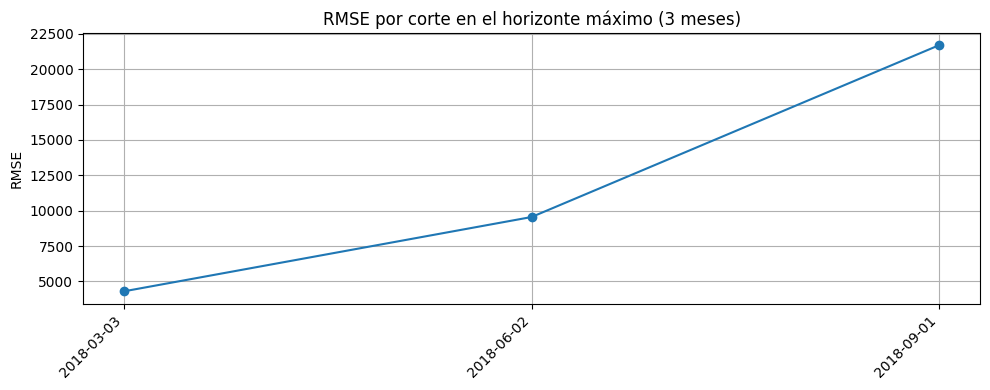

In [ ]:
# ======================
# A. Prep: MAPE por cutoff x mes de horizonte
# ======================
df_cv_plot = df_cv.copy()
df_cv_plot['h_months'] = np.rint(df_cv_plot['horizon'].dt.total_seconds()/86400/30.44).astype(int)
df_cv_plot['APE'] = np.abs((df_cv_plot['y'] - df_cv_plot['yhat']) / df_cv_plot['y'].replace(0, np.nan)) * 100

mape_cutoff_h = (
    df_cv_plot.groupby(['cutoff','h_months'])['APE']
              .mean()
              .reset_index()
              .sort_values(['cutoff','h_months'])
)


# ======================
# D. Línea: RMSE en el horizonte máximo (3 meses) por corte
# ======================
idx_last = df_cv.groupby('cutoff')['horizon'].idxmax()
last_step = df_cv.loc[idx_last].copy()
last_step['RMSE_pt'] = (last_step['y'] - last_step['yhat'])**2  # por punto
rmse_by_cutoff = last_step.groupby('cutoff')['RMSE_pt'].mean().pow(0.5).reset_index()

plt.figure(figsize=(10,4))
plt.plot(rmse_by_cutoff['cutoff'], rmse_by_cutoff['RMSE_pt'], marker='o')
plt.xticks(rmse_by_cutoff['cutoff'], [c.strftime('%Y-%m-%d') for c in rmse_by_cutoff['cutoff']],
           rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('RMSE por corte en el horizonte máximo (3 meses)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

# Serie mensual con índice
y = df_monthly.copy().set_index('ds')['y'].asfreq('MS')

# Horizonte de evaluación (ajusta 6 o 12)
horizon = 12
train = y.iloc[:-horizon]
test  = y.iloc[-horizon:]


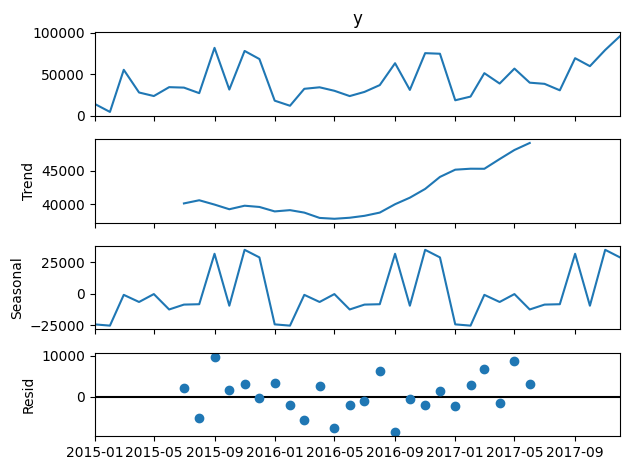

In [ ]:
decomp = seasonal_decompose(train, period=12, model='additive')  # en log, multiplicatividad se vuelve aditiva
decomp.plot(); plt.tight_layout(); plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# D=1 (estacional, s=12)
diff_S  = train.diff(12).dropna()
print("ADF solo S:", adfuller(diff_S)[0], adfuller(diff_S)[1])

# Si p>0.05, agregar d=1
diff_SD = diff_S.diff().dropna()
print("ADF S + d=1:", adfuller(diff_SD)[0], adfuller(diff_SD)[1])

# Elegí la serie estacionaria para diagnósticos:
series_stat = diff_SD if adfuller(diff_S)[1] > 0.05 else diff_S


ADF solo S: 0.7684393024013971 0.9911092547387426
ADF S + d=1: -2.572252020122796 0.09886888783737485


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

Mejor AIC: 10.99  | Órdenes: (p,d,q,P,D,Q)=(0, 1, 1, 0, 1, 1)
RMSE SARIMA: 20,681.04
MAE  SARIMA: 19,328.72
MAPE SARIMA: 22.87%


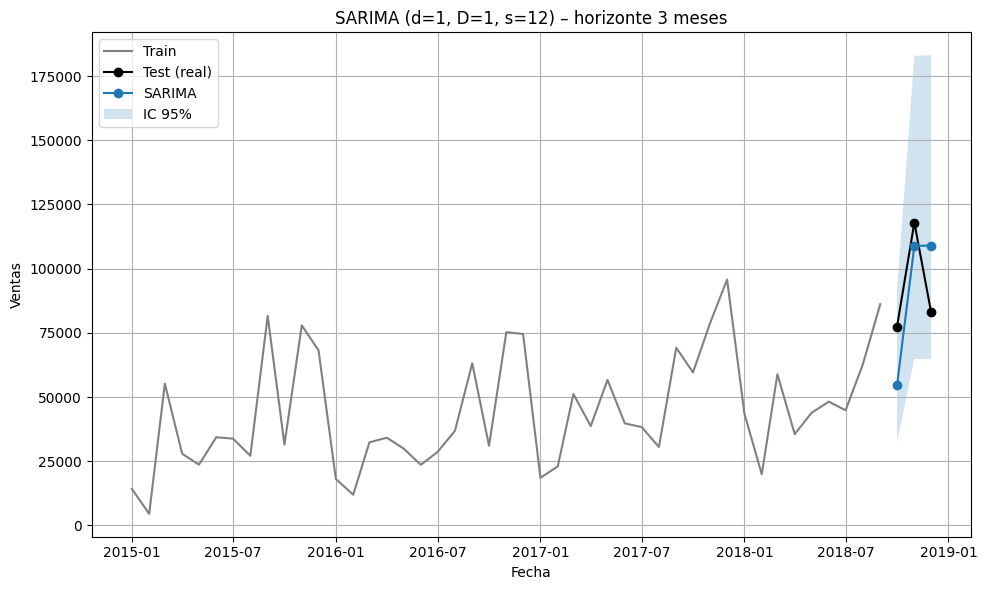

      lb_stat  lb_pvalue
12  16.682848   0.161922


<Figure size 800x300 with 0 Axes>

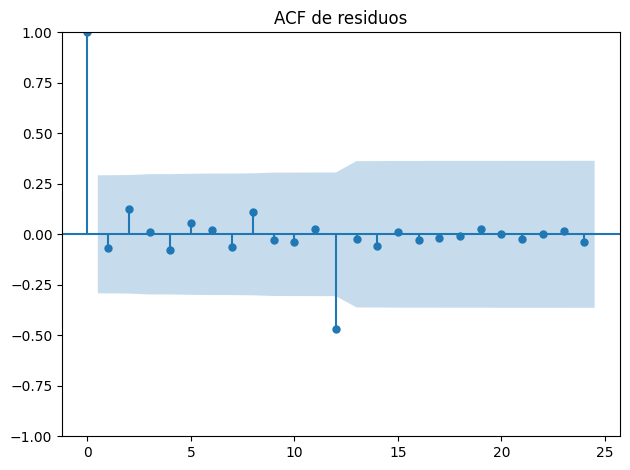

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# ===== 0) Serie mensual y split =====
# Asumo que ya tenés df_monthly con columnas ['ds','y']
y = df_monthly.copy().set_index('ds')['y'].asfreq('MS')

# Cambiá acá el horizonte si querés comparar (3 o 6)
horizon = 3
train = y.iloc[:-horizon]
test  = y.iloc[-horizon:]

# ===== 1) Capado suave + log =====
p1, p99 = train.quantile([0.01, 0.99])
train_cap = train.clip(p1, p99)
train_log = np.log1p(train_cap)  # estabiliza varianza

# ===== 2) Grid SARIMA con d=1, D=1, s=12 =====
d, D, s = 1, 1, 12
grid_pq  = [0,1,2]
grid_PQ  = [0,1]

best_aic = np.inf
best_cfg = None
best_fit = None

for p, q in product(grid_pq, grid_pq):
    for P, Q in product(grid_PQ, grid_PQ):
        try:
            model = SARIMAX(train_log,
                            order=(p,d,q),
                            seasonal_order=(P,D,Q,s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            fit = model.fit(disp=False)
            if fit.aic < best_aic:
                best_aic = fit.aic
                best_cfg = (p,d,q,P,D,Q)
                best_fit = fit
        except Exception:
            pass

print(f"Mejor AIC: {best_aic:.2f}  | Órdenes: (p,d,q,P,D,Q)={best_cfg}")

# ===== 3) Pronóstico y métricas =====
fc = best_fit.get_forecast(steps=horizon)
pred_log = fc.predicted_mean
ci_log   = fc.conf_int()  # en escala log

# volver a escala original
pred = np.expm1(pred_log)
ci   = np.expm1(ci_log)

rmse = np.sqrt(np.mean((test.values - pred.values)**2))
mae  = np.mean(np.abs(test.values - pred.values))
mape = np.mean(np.abs((test.values - pred.values) / test.values)) * 100

print(f"RMSE SARIMA: {rmse:,.2f}")
print(f"MAE  SARIMA: {mae:,.2f}")
print(f"MAPE SARIMA: {mape:,.2f}%")

# ===== 4) Gráfico =====
plt.figure(figsize=(10,6))
plt.plot(train.index, train.values, label='Train', color='gray')
plt.plot(test.index,  test.values,  label='Test (real)', color='black', marker='o')
plt.plot(pred.index,  pred.values,  label='SARIMA', color='tab:blue', marker='o')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.2, label='IC 95%')
plt.title(f'SARIMA (d=1, D=1, s=12) – horizonte {horizon} meses')
plt.xlabel('Fecha'); plt.ylabel('Ventas'); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ===== 5) Diagnóstico de residuos =====
resid = best_fit.resid.dropna()
print(acorr_ljungbox(resid, lags=[12], return_df=True))  # p-valor alto => sin autocorrelación remanente
plt.figure(figsize=(8,3))
plot_acf(resid, lags=24)
plt.title('ACF de residuos'); plt.tight_layout(); plt.show()


[CHECK] n_months=48, initial=38 meses (~80%), horizon=3 meses, period=3 meses


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



[Métricas por corte SARIMA]
                    RMSE           MAE       MAPE
cutoff                                           
2018-02-01  16004.227976  13920.157164  33.877362
2018-05-01  11752.005365   7896.030240  13.217622
2018-08-01  18446.095761  15795.865512  16.022817

[Métricas promedio SARIMA]
RMSE    15400.776367
MAE     12537.350972
MAPE       21.039267
dtype: float64


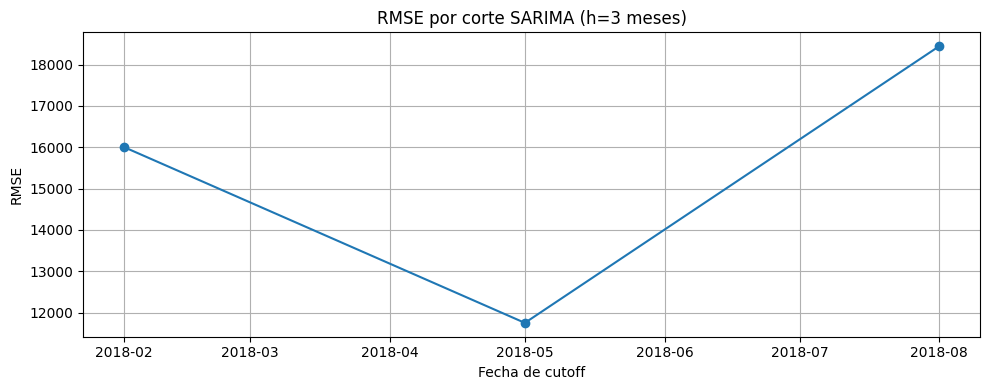

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ===== 1) Serie mensual =====
y = df_monthly.copy().set_index('ds')['y'].asfreq('MS')

# ===== 2) Parámetros =====
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)
horizon = 3
period = 3

# Calcular tamaño inicial = 80%
n_months = len(y)
initial = int(n_months * 0.8)

print(f"[CHECK] n_months={n_months}, initial={initial} meses (~80%), horizon={horizon} meses, period={period} meses")

# ===== 3) Rolling Cross-Validation =====
cutoffs = []
metrics = []

for start in range(initial, n_months - horizon + 1, period):
    train = y.iloc[:start]
    test  = y.iloc[start:start + horizon]

    # Entrenar SARIMA
    model = SARIMAX(train,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    fit = model.fit(disp=False)

    # Predicción
    pred = fit.get_forecast(steps=horizon).predicted_mean

    # Métricas
    rmse = np.sqrt(np.mean((test.values - pred.values)**2))
    mae  = np.mean(np.abs(test.values - pred.values))
    mape = np.mean(np.abs((test.values - pred.values) / test.values)) * 100

    cutoffs.append(train.index[-1])
    metrics.append([rmse, mae, mape])

# ===== 4) DataFrame resultados =====
df_cv_sarima = pd.DataFrame(metrics, columns=['RMSE', 'MAE', 'MAPE'], index=cutoffs)
df_cv_sarima.index.name = 'cutoff'

print("\n[Métricas por corte SARIMA]")
print(df_cv_sarima)

print("\n[Métricas promedio SARIMA]")
print(df_cv_sarima.mean())

# ===== 5) Gráfico RMSE por corte =====
plt.figure(figsize=(10,4))
plt.plot(df_cv_sarima.index, df_cv_sarima['RMSE'], marker='o')
plt.title(f"RMSE por corte SARIMA (h={horizon} meses)")
plt.xlabel("Fecha de cutoff")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-3651890083.py:117: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-3651890083.py:117: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-3651890083.py:117: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X

[Híbrido SARIMA+XGB, H=3] RMSE=18,557.46 | MAE=16,771.36 | MAPE=17.59%


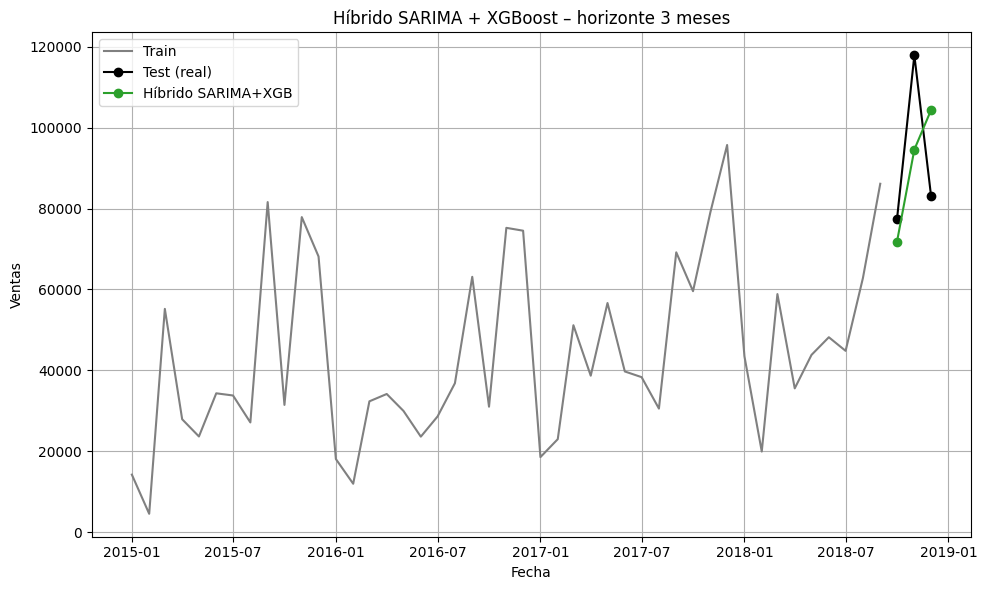

In [ ]:
# ============================================
# Híbrido mejorado: SARIMA + XGBoost (H=3)
# - SARIMA modela el nivel
# - XGB corrige el residual usando lags/rollings + calendario
# Requiere: df_monthly con ['ds','y'] mensual sin huecos
# ============================================

# !pip -q install xgboost statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor

# -----------------------------
# 0) Datos y split
# -----------------------------
assert {'ds','y'}.issubset(df_monthly.columns), "df_monthly debe tener ['ds','y']"
dfm = df_monthly.copy().sort_values('ds')
dfm['ds'] = pd.to_datetime(dfm['ds'])
y = dfm.set_index('ds')['y'].asfreq('MS').astype(float)

H = 3  # horizonte corto
train = y.iloc[:-H]
test  = y.iloc[-H:]


# -----------------------------
# 1) SARIMA (tu config ganadora)
# -----------------------------
sarima = SARIMAX(
    train_cap,
    order=(0,1,1),
    seasonal_order=(0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# one-step in-sample para residuos (alineado a train_cap)
pred_in = sarima.get_prediction(start=train_cap.index[0], end=train_cap.index[-1], dynamic=False).predicted_mean
residuals = (train_cap - pred_in).dropna()

# forecast del nivel para el horizonte
sarima_fc = sarima.get_forecast(steps=H).predicted_mean
sarima_fc.index = test.index  # asegurar alineación

# -----------------------------
# 2) Features (lags/rollings + calendario)
# -----------------------------
def add_lag_roll_features(series: pd.Series) -> pd.DataFrame:
    """Crea lags y rolling stats SIN fuga (shift=1) sobre el nivel 'series'."""
    df = pd.DataFrame(index=series.index)
    # Lags del nivel
    for k in [1, 2, 3, 12, 24]:
        df[f'lag{str(k)}'] = series.shift(k)
    # Rolling medias / std (shift=1 para no usar el dato actual)
    df['ma3']  = series.shift(1).rolling(3).mean()
    df['ma6']  = series.shift(1).rolling(6).mean()
    df['std3'] = series.shift(1).rolling(3).std()
    df['std6'] = series.shift(1).rolling(6).std()
    return df

def add_calendar_features(idx: pd.DatetimeIndex) -> pd.DataFrame:
    """Mes, seno/cos anual y año."""
    dfc = pd.DataFrame(index=idx)
    dfc['month'] = idx.month
    dfc['month_sin'] = np.sin(2*np.pi*dfc['month']/12)
    dfc['month_cos'] = np.cos(2*np.pi*dfc['month']/12)
    dfc['year'] = idx.year
    return dfc.astype(float)

# matriz de features para ENTRENAR XGB (sobre residuo)
X_level = add_lag_roll_features(train)           # a partir del NIVEL real
X_cal   = add_calendar_features(train.index)
X_base  = pd.concat([X_level, X_cal], axis=1)

# objetivo = residuo (usar los índices comunes para evitar NaN de lags/rollings)
common_idx = residuals.index.intersection(X_base.dropna().index)
X_train = X_base.loc[common_idx].astype(float)
y_train = residuals.loc[common_idx].astype(float)

FEATURES = X_train.columns.tolist()

# -----------------------------
# 3) XGBoost sobre residuos (con más señal)
# -----------------------------
xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42
)
xgb.fit(X_train, y_train)

# -----------------------------
# 4) Walk-forward (H pasos) SOLO del híbrido
# -----------------------------
# Usamos:
#  - history_y: nivel (train + predicciones híbridas) para generar lags/rollings
#  - res_hist: residuos predichos para usar implícitamente vía lags del nivel (no de residuo)
history_y = train.copy()
hybrid_list = []

for dt in test.index:
    # features para dt construidas con "lo que hay hasta dt-1"
    X_lvl_row = add_lag_roll_features(history_y).iloc[[-1]]  # última fila (dt-1)
    X_cal_row = add_calendar_features(pd.DatetimeIndex([dt]))
    X_row = pd.concat([X_lvl_row.reset_index(drop=True), X_cal_row.reset_index(drop=True)], axis=1)

    # completar NaN por si algún lag largo no existe aún
    X_row = X_row.reindex(columns=FEATURES)
    X_row = X_row.fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)

    resid_hat = float(xgb.predict(X_row)[0])
    y_hat = float(sarima_fc.loc[dt] + resid_hat)

    hybrid_list.append(y_hat)
    # agregamos la predicción híbrida al historial para lags del próximo paso
    history_y.loc[dt] = y_hat

hybrid_fc = pd.Series(hybrid_list, index=test.index)

# -----------------------------
# 5) Métricas y gráfico (híbrido)
# -----------------------------
rmse = np.sqrt(mean_squared_error(test.values, hybrid_fc.values))
mae  = mean_absolute_error(test.values, hybrid_fc.values)
mape = (np.abs((test.values - hybrid_fc.values) / test.values).mean()) * 100
print(f"[Híbrido SARIMA+XGB, H={H}] RMSE={rmse:,.2f} | MAE={mae:,.2f} | MAPE={mape:.2f}%")

plt.figure(figsize=(10,6))
plt.plot(train.index, train.values, label='Train', color='gray')
plt.plot(test.index,  test.values,  label='Test (real)', color='black', marker='o')
plt.plot(test.index,  hybrid_fc.values, label='Híbrido SARIMA+XGB', color='tab:green', marker='o')
plt.title(f'Híbrido SARIMA + XGBoost – horizonte {H} meses')
plt.xlabel('Fecha'); plt.ylabel('Ventas'); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor

# -----------------------------
# 0) Datos base
# -----------------------------
dfm = df_monthly.copy().sort_values('ds')
dfm['ds'] = pd.to_datetime(dfm['ds'])
y_full = dfm.set_index('ds')['y'].asfreq('MS').astype(float)

# -----------------------------
# Configuración de CV
# -----------------------------
horizon_m = 3
period_m  = 3
initial_m = 38  # meses de entrenamiento inicial
n_months  = len(y_full)

metrics = []

def add_lag_roll_features(series: pd.Series) -> pd.DataFrame:
    df = pd.DataFrame(index=series.index)
    for k in [1, 2, 3, 12, 24]:
        df[f'lag{k}'] = series.shift(k)
    df['ma3']  = series.shift(1).rolling(3).mean()
    df['ma6']  = series.shift(1).rolling(6).mean()
    df['std3'] = series.shift(1).rolling(3).std()
    df['std6'] = series.shift(1).rolling(6).std()
    return df

def add_calendar_features(idx: pd.DatetimeIndex) -> pd.DataFrame:
    dfc = pd.DataFrame(index=idx)
    dfc['month'] = idx.month
    dfc['month_sin'] = np.sin(2*np.pi*dfc['month']/12)
    dfc['month_cos'] = np.cos(2*np.pi*dfc['month']/12)
    dfc['year'] = idx.year
    return dfc.astype(float)

# -----------------------------
# CV Loop
# -----------------------------
for start in range(0, n_months - initial_m - horizon_m + 1, period_m):
    train_end = initial_m + start
    cutoff = y_full.index[train_end - 1]  # último mes de train
    train = y_full.iloc[:train_end]
    test  = y_full.iloc[train_end:train_end + horizon_m]

    # --- SARIMA ---
    sarima = SARIMAX(
        train,
        order=(0,1,1),
        seasonal_order=(0,1,1,12),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    pred_in = sarima.get_prediction(start=train.index[0], end=train.index[-1], dynamic=False).predicted_mean
    residuals = (train - pred_in).dropna()

    sarima_fc = sarima.get_forecast(steps=horizon_m).predicted_mean
    sarima_fc.index = test.index

    # --- XGB sobre residuos ---
    X_level = add_lag_roll_features(train)
    X_cal   = add_calendar_features(train.index)
    X_base  = pd.concat([X_level, X_cal], axis=1)
    common_idx = residuals.index.intersection(X_base.dropna().index)
    X_train = X_base.loc[common_idx].astype(float)
    y_train = residuals.loc[common_idx].astype(float)

    FEATURES = X_train.columns.tolist()

    xgb = XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=3,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42
    )
    xgb.fit(X_train, y_train)

    # --- Walk-forward dentro del horizonte ---
    history_y = train.copy()
    hybrid_preds = []

    for dt in test.index:
        X_lvl_row = add_lag_roll_features(history_y).iloc[[-1]]
        X_cal_row = add_calendar_features(pd.DatetimeIndex([dt]))
        X_row = pd.concat([X_lvl_row.reset_index(drop=True), X_cal_row.reset_index(drop=True)], axis=1)
        X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)

        resid_hat = float(xgb.predict(X_row)[0])
        y_hat = float(sarima_fc.loc[dt] + resid_hat)

        hybrid_preds.append(y_hat)
        history_y.loc[dt] = y_hat

    hybrid_fc = pd.Series(hybrid_preds, index=test.index)

    # --- Métricas ---
    rmse = np.sqrt(mean_squared_error(test.values, hybrid_fc.values))
    mae  = mean_absolute_error(test.values, hybrid_fc.values)
    mape = (np.abs((test.values - hybrid_fc.values) / test.values).mean()) * 100
    metrics.append((cutoff, rmse, mae, mape))

# -----------------------------
# Resultados
# -----------------------------
df_metrics = pd.DataFrame(metrics, columns=['cutoff', 'RMSE', 'MAE', 'MAPE'])
print("\n[Métricas por corte - SARIMA+XGB]")
print(df_metrics)
print("\n[Métricas promedio]")
print(df_metrics[['RMSE', 'MAE', 'MAPE']].mean())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Us


[Métricas por corte - SARIMA+XGB]
      cutoff          RMSE           MAE       MAPE
0 2018-02-01  17879.275354  17158.877569  39.624784
1 2018-05-01  18781.495628  16729.996343  30.764951
2 2018-08-01  17126.226242  15857.765392  16.239528

[Métricas promedio]
RMSE    17928.999075
MAE     16582.213102
MAPE       28.876421
dtype: float64


/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
/tmp/ipython-input-2790062477.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_row = X_row.reindex(columns=FEATURES).fillna(method='ffill').fillna(method='bfill').fillna(0.0).astype(float)
